In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
netflix=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### .info() shows that 10 columns has 'object' datatype and only one column has 'int64'

In [4]:
df=netflix.copy()
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.isnull().sum()
fill= df.fillna('N/A')


#### find out all null values and replace them.

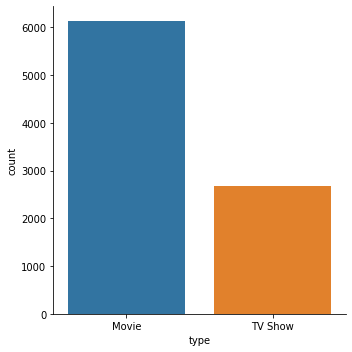

In [6]:
sns.catplot('type',kind = 'count',data = df,aspect =1)

#### Observation: Above chart gives the visuals for number of movies and number of TV Shows. It is clear from graph that Movies count is higher than TV shows count.


<AxesSubplot:xlabel='counts', ylabel='country'>

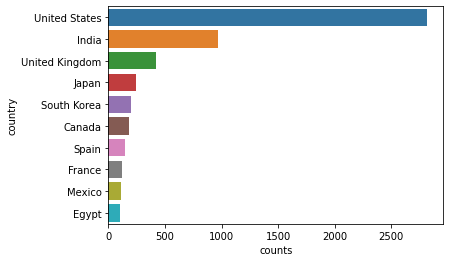

In [7]:
top10=df['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:10]
top10
sns.barplot(y='country', x='counts', data=top10)

#### Observation: Above graph gives the visuals of countrywise content distibution for top 10 countries. United States has most content on Netflix.

<AxesSubplot:xlabel='counts', ylabel='country'>

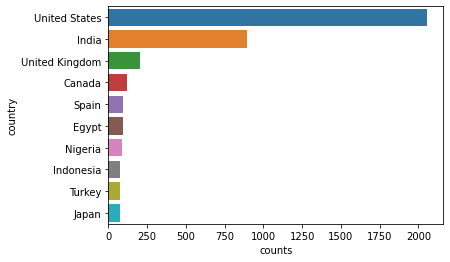

In [8]:
topMovie=df['type']=='Movie'
df1=df[topMovie]
Movies=df1['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:10]
sns.barplot(y='country', x='counts', data=Movies)

#### Observation: Above graph shows the countrywise Movies count. United States has "Most Movies" on Netflix.

<AxesSubplot:xlabel='counts', ylabel='country'>

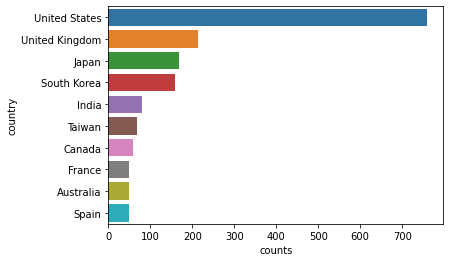

In [9]:
topTV=df['type']=='TV Show'
df2=df[topTV]
TVshow=df2['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:10]
sns.barplot(y='country', x='counts', data=TVshow)

#### Observation: Above graph shows the countrywise TV Shows count. United States has "Most TV Shows" on Netflix.

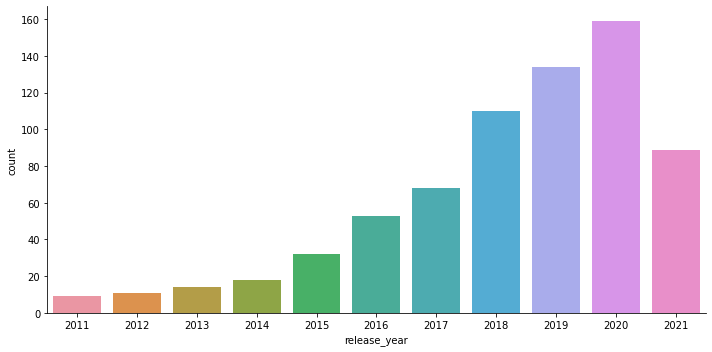

In [10]:
sr=df2[df2['country']=='United States']
t=sr['release_year']>2010
sr1=sr[t]
sns.catplot('release_year',kind = 'count',data = sr1,aspect =2)

#### Observation: Above graph shows that United States has gradual increase in TV Shows till 2020 and in 2020 it has maximum TV Shows.

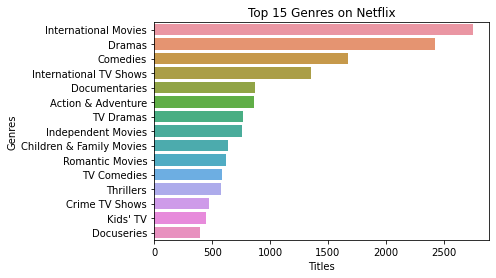

In [11]:
Genres= df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
sns.countplot(y = Genres, order=Genres.value_counts().index[:15])
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

#### Observation: Above graph shows the differt geners of shows and movies. 'International Movies' has most content.

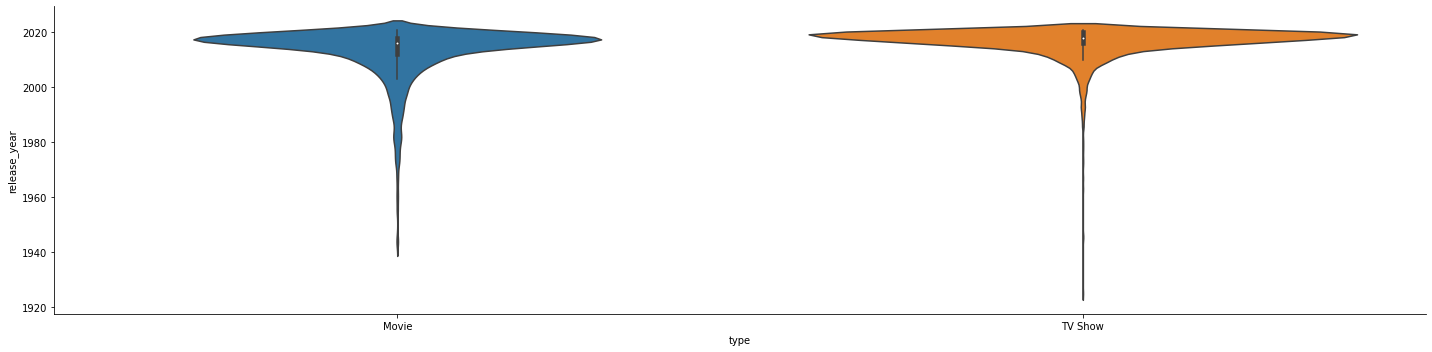

In [12]:
df['date'] = pd.to_datetime(df['date_added'])
df['year'] = df['date'].apply(lambda datetime: datetime.year)
df['month'] = df['date'].apply(lambda datetime: datetime.month)
data_dict1 = {'Country': df.groupby('country').size().sort_values(ascending=False)[:20].index,
             'Number of content': df.groupby('country').size().sort_values(ascending=False)[:20].values
             }
df_1 = pd.DataFrame(data=data_dict1, columns=['Country', 'Number of content'])
sns.catplot(x = 'type',y = 'release_year',kind = 'violin',data = df,aspect=4)

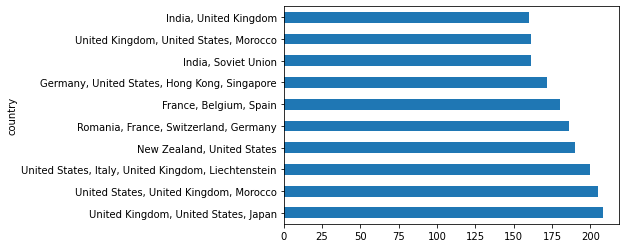

In [13]:
df1['duration']=df1.duration.str.replace('min','',regex=False).astype('float64')
df2=df1.groupby(['country'])['duration'].mean().nlargest(10).plot(kind='barh')

In [14]:
for i in df['cast'].str.split(','):
     if type(i)==list:
        for j in i:
            if(i.count(j))>1:
                print(j,i.count(j))

 Micah Hauptman 2
 Micah Hauptman 2
 Adrianna Biedrzyńska 2
 Adrianna Biedrzyńska 2


In [15]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,9.0


In [16]:
df.groupby('country').count()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,date,year,month
country,,,,,,,,,,,,,,
", France, Algeria",1,1,1,1,1,1,1,1,1,1,1,1,1,1
", South Korea",1,1,1,0,1,1,1,1,1,1,1,1,1,1
Argentina,56,56,56,40,51,56,56,56,56,56,56,56,56,56
"Argentina, Brazil, France, Poland, Germany, Denmark",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile",2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Venezuela, Colombia",1,1,1,1,0,1,1,1,1,1,1,1,1,1
Vietnam,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [17]:
df[['country']].head(20)

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
5,NaN
6,NaN
7,"United States, Ghana, Burkina Faso, United Kin..."
8,United Kingdom
9,United States


In [18]:
data_dict4 = {'year': df.groupby('month').size().sort_values(ascending=False).nlargest(10).index,
             'n_content': df.groupby('month').size().sort_values(ascending=False).nlargest(10).index}
df_4 = pd.DataFrame(data=data_dict4, columns=['year', 'n_content'])
df_4

,year,n_content
0,7.0,7.0
1,12.0,12.0
2,9.0,9.0
3,4.0,4.0
4,10.0,10.0
5,8.0,8.0
6,3.0,3.0
7,1.0,1.0
8,6.0,6.0
9,11.0,11.0


In [19]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020.0,1.0
